# Stroken Prediction 

### Contexto: 

De acordo com a Organização Mundial da Saúde (OMS), o AVC é a segunda principal causa de morte globalmente, sendo responsável por aproximadamente 11% do total de mortes. Este conjunto de dados é usado para prever se um paciente tem probabilidade de sofrer um AVC com base em parâmetros de entrada, como gênero, idade, várias doenças e status de tabagismo. Cada linha nos dados fornece informações relevantes sobre o paciente.

### Informações sobre atributos:
1) __id__: identificador único
2) __gênero__: "Masculino", "Feminino" ou "Outro"
3) __idade__: idade do paciente
4) __hipertensão__: 0 se o paciente não tiver hipertensão, 1 se o paciente tiver hipertensão
5) __doença cardíaca__: 0 se o paciente não tiver doença cardíaca, 1 se o paciente tiver doença cardíaca
6) __já casado__: "Não" ou "Sim"
7) __tipo de trabalho__: "crianças"(`children`), "Funcionário público"(`Govt_jov`), "Nunca trabalhou"(`Never_worked`), "Privado"(`Private`) ou "Autônomo"(`Self-employed`)
8) __tipo de residência__: "Rural" ou "Urbana"
9) __nível médio de glicose__: nível médio de glicose no sangue
10) __IMC__: índice de massa corporal
11) __status de tabagismo__: "ex-fumante"(`formerly smoked`), "nunca fumou"(`formerly smoked`), "fuma"(`smokes`) ou "Desconhecido"(`Unknown`)
12) __AVC__: 1 se o paciente teve um AVC ou 0 se não teve

> Nota: "Desconhecido" em status de tabagismo significa que as informações não estão disponíveis para este paciente.

In [279]:
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [280]:
data =  pd.read_csv(r'datasets/StrokePredictionDataset/healthcare-dataset-stroke-data.csv',sep=',')

In [281]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Analise dos dados

In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [283]:
data.shape

(5110, 12)

### Removendo valores `NULL` | `NAN` no meu conjunto de dados

In [284]:
data.dropna(inplace= True)

In [285]:
for nameColumn in data.columns:
    selecao = data[nameColumn].loc[ data[nameColumn].isna() == True ]
    if len(selecao) != 0 : print(f'na coluna {nameColumn} tem valores NULL | NaN')
print('OK')

OK


### Hipertensão

verificando as pessoas que tem ou não hipertensão e depois obteve AVC 

In [286]:
countHipeStrokes = data.groupby(by=['stroke'])['hypertension'].value_counts().reset_index(name='quantity')

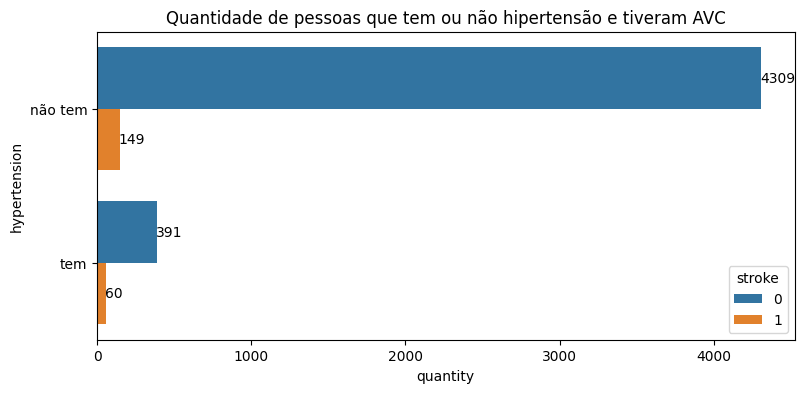

In [287]:
plt.figure(figsize=(9,4))
bar = sea.barplot(
    countHipeStrokes,
    x = countHipeStrokes['quantity'],
    y = countHipeStrokes['hypertension'],
    hue =countHipeStrokes['stroke'],
    orient='h',
    width=0.8
)

plt.yticks([0,1],['não tem','tem'])
for p in bar.patches:
    if p.get_width() != 0: bar.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2), xytext=(-1, 0), textcoords='offset points', ha='left', va="center")
plt.title('Quantidade de pessoas que tem ou não hipertensão e tiveram AVC')
plt.show()

### Doença cardiaca
vou fazer pela mesma logica feito acima

In [288]:
countHeartStrokes = data.groupby(by=['stroke'])['heart_disease'].value_counts().reset_index(name='quantity')

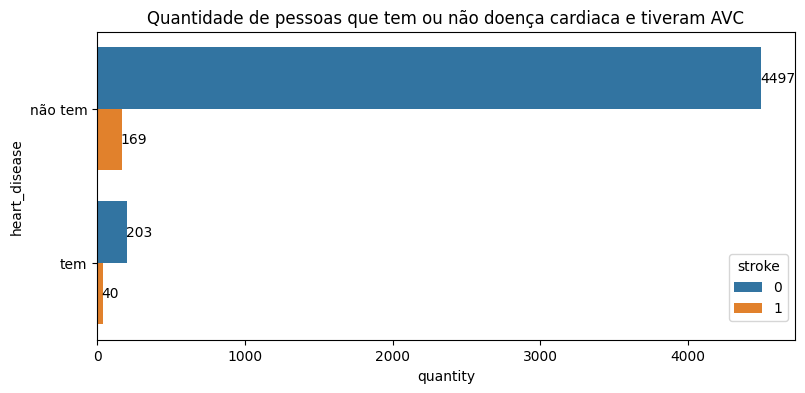

In [289]:
plt.figure(figsize=(9,4))
bar = sea.barplot(
    countHeartStrokes,
    x = countHeartStrokes['quantity'],
    y = countHeartStrokes['heart_disease'],
    hue =countHeartStrokes['stroke'],
    orient='h',
    width=0.8
)
plt.yticks([0,1],['não tem','tem'])
plt.legend(bbox_to_anchor=(1,0.3,0,0),title='stroke')
for p in bar.patches:
    if p.get_width() != 0:
        bar.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2), xytext=(-1, 0), textcoords='offset points', ha='left', va="center")
plt.title('Quantidade de pessoas que tem ou não doença cardiaca e tiveram AVC')
plt.show()

### Doença cardiaca e hipertensão

In [290]:
countHipeHeathStrokes = data.groupby( by=['stroke'])[['hypertension','heart_disease']].value_counts().reset_index(name='quantity')

In [291]:
countHipeHeathStrokes['%'] = countHipeHeathStrokes['quantity']/countHipeHeathStrokes['quantity'].sum()*100

In [292]:
pd.options.mode.chained_assignment = None 
for coluna in countHipeHeathStrokes.columns[:3]:
    countHipeHeathStrokes[coluna].loc[ countHipeHeathStrokes[coluna] == 0 ] = 'não teve'
    countHipeHeathStrokes[coluna].loc[ countHipeHeathStrokes[coluna] == 1 ] = 'teve'

/tmp/ipykernel_10354/3458631651.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'não teve' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  countHipeHeathStrokes[coluna].loc[ countHipeHeathStrokes[coluna] == 0 ] = 'não teve'
/tmp/ipykernel_10354/3458631651.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'não teve' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  countHipeHeathStrokes[coluna].loc[ countHipeHeathStrokes[coluna] == 0 ] = 'não teve'
/tmp/ipykernel_10354/3458631651.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'não teve' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  countHipeHeathStrokes[coluna].loc[ countHipeHeathStrokes[coluna] 

In [293]:
countHipeHeathStrokes

,stroke,hypertension,heart_disease,quantity,%
0,não teve,não teve,não teve,4153,84.599715
1,não teve,teve,não teve,344,7.007537
2,não teve,não teve,teve,156,3.177837
3,não teve,teve,teve,47,0.957425
4,teve,não teve,não teve,120,2.444490
5,teve,teve,não teve,49,0.998167
6,teve,não teve,teve,29,0.590752
7,teve,teve,teve,11,0.224078


### Strokes

In [294]:
countStrokes = data['stroke'].value_counts().reset_index(name='quantity')

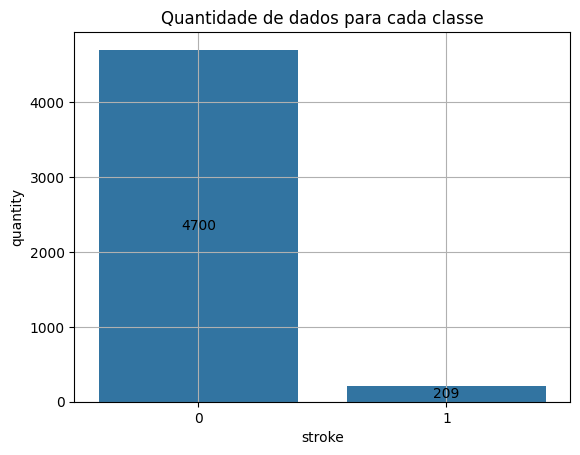

In [295]:
bar = sea.barplot(
    countStrokes,
    x = 'stroke',
    y = 'quantity' 
)
bar.bar_label(bar.containers[0], fmt='%.0f', label_type='center')
plt.title('Quantidade de dados para cada classe')
plt.grid(True)
plt.show()

#### __OBS !!! __
> O há um desiquilibrio entre as classes stroke para a predição se faz necessário um hoversampling ou undersampling.

&nbsp;

### Tipo de residencia

In [296]:
data['Residence_type'].value_counts().reset_index(name='Quantity')

,Residence_type,Quantity
0,Urban,2490
1,Rural,2419


### tipo de tabalho

In [297]:
data['work_type'].value_counts().reset_index(name='quantidade')

,work_type,quantidade
0,Private,2811
1,Self-employed,775
2,children,671
3,Govt_job,630
4,Never_worked,22


### Por genero

In [298]:
data['gender'].value_counts().reset_index(name='quantidade')

,gender,quantidade
0,Female,2897
1,Male,2011
2,Other,1


devido `other` possui dado insuficiente será retirado da tabela 

In [299]:
data.drop(
    index   = (
        data.loc[data['gender'] == 'Other'].index
    ),
    inplace = True 
)

In [300]:
data['gender'].value_counts().reset_index(name='quantidade')

,gender,quantidade
0,Female,2897
1,Male,2011


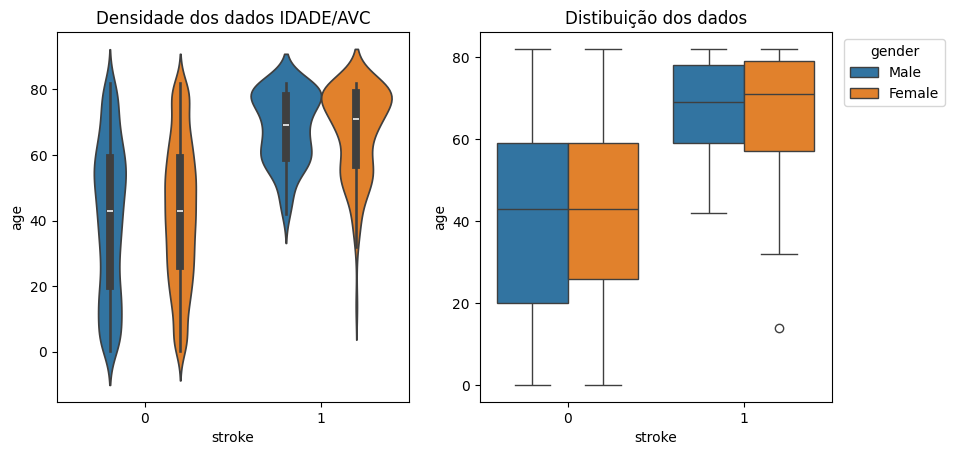

In [301]:
fig ,ax = plt.subplots(1,2)
fig.set_figwidth(10)
ax[0].set_title('Densidade dos dados IDADE/AVC')

sea.violinplot(
    data,
    x = data['stroke'],
    y = data['age']   ,
    hue= data['gender'],
    ax = ax[0],
    legend=False
)
ax[1].set_title('Distibuição dos dados')
sea.boxplot(
    x = data['stroke'],
    y = data['age']   ,
    hue= data['gender'],
    ax = ax[1]
)
ax[1].legend(bbox_to_anchor=(1.34,1,0,0),title='gender')
plt.show()

In [302]:
meanYearStroke = data.groupby(by=['gender','stroke'])['age'].mean().reset_index(name='mean')

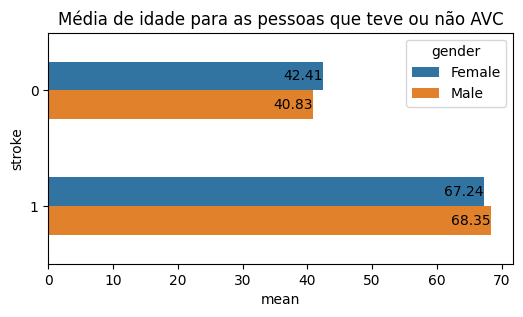

In [303]:
plt.figure(figsize=(6,3))
bar = sea.barplot(
    meanYearStroke,
    x = meanYearStroke['mean'],
    y = meanYearStroke['stroke'],
    hue =meanYearStroke['gender'],
    orient='h',
    width=0.5
)

for p in bar.patches:
    if p.get_width() != 0:
        bar.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2), xytext=(0, 0), textcoords='offset points', ha='right', va="center")
plt.title('Média de idade para as pessoas que teve ou não AVC')
plt.show()

### status de tabagismo

In [304]:
data['smoking_status'].value_counts().reset_index(name='quantity')

,smoking_status,quantity
0,never smoked,1852
1,Unknown,1483
2,formerly smoked,836
3,smokes,737


In [305]:
selectTab = data[['avg_glucose_level','bmi','smoking_status','age']]

In [306]:
data.groupby(by='stroke')['smoking_status'].value_counts().reset_index(name='quantity')

,stroke,smoking_status,quantity
0,0,never smoked,1768
1,0,Unknown,1454
2,0,formerly smoked,779
3,0,smokes,698
4,1,never smoked,84
5,1,formerly smoked,57
6,1,smokes,39
7,1,Unknown,29


In [307]:
fig , ax = plt.subplots(1,2)
fig.set_figwidth(10)
sea.kdeplot(
    selectTab,
    x = selectTab['avg_glucose_level'],
    y = selectTab['bmi'],
    hue = selectTab['smoking_status'],
    ax   = ax[0],
    legend=True
    
)
sea.kdeplot(
    selectTab,
    x   = selectTab['age'],
    y   = selectTab['avg_glucose_level'],
    hue = selectTab['smoking_status'],
    ax  = ax[1],
    legend=False

)
plt.show()

&nbsp;

# Predição

In [ ]:
import copy
from sklearn.metrics         import *
from sklearn.preprocessing   import OrdinalEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.tree            import DecisionTreeClassifier
from sklearn.neighbors       import KNeighborsClassifier

### Tratamento dos dados

In [ ]:
dataset = copy.deepcopy(data)

In [ ]:
dataset.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


#### removendo colunas inuteis

In [ ]:
dataset.drop(
    columns = ['id','ever_married'],
    inplace = True
)

#### Passando dados categoricos para numericos

##### Genero

In [ ]:
classeGenero = LabelBinarizer()

In [ ]:
dataset['gender'] = classeGenero.fit_transform(dataset['gender'])

##### Tipo de residencia

In [ ]:
classeTipoResidencia = LabelBinarizer()

In [ ]:
dataset['Residence_type'] = classeTipoResidencia.fit_transform(dataset['Residence_type'])

##### Tipo de trabalho

In [ ]:
dummiesWork = pd.get_dummies(data['work_type'],dtype=int,prefix='workType')

In [ ]:
dataset    = pd.concat(
    [dataset,dummiesWork],axis=1
) 

In [ ]:
dataset.drop( columns=['work_type'] ,inplace=True )

##### smoking_status

In [ ]:
dummiesSmokingStatus = pd.get_dummies(data['smoking_status'],dtype=int,prefix='smokingStatus')

In [ ]:
dataset    = pd.concat(
    [dataset,dummiesSmokingStatus],axis=1
) 

In [ ]:
dataset.drop( columns='smoking_status' ,inplace=True )

#### Resultado final do tratamento

In [ ]:
dataset.head(2)

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,stroke,workType_Govt_job,workType_Never_worked,workType_Private,workType_Self-employed,workType_children,smokingStatus_Unknown,smokingStatus_formerly smoked,smokingStatus_never smoked,smokingStatus_smokes
0,1,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
2,1,80.0,0,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0


#### Correlação

In [ ]:
dataset.corrwith(dataset['stroke']).reset_index(name='Corr')

,index,Corr
0,gender,0.006904
1,age,0.232313
2,hypertension,0.142503
3,heart_disease,0.137929
4,Residence_type,0.005988
5,avg_glucose_level,0.138984
6,bmi,0.042341
7,stroke,1.000000
8,workType_Govt_job,0.003537
9,workType_Never_worked,-0.014152


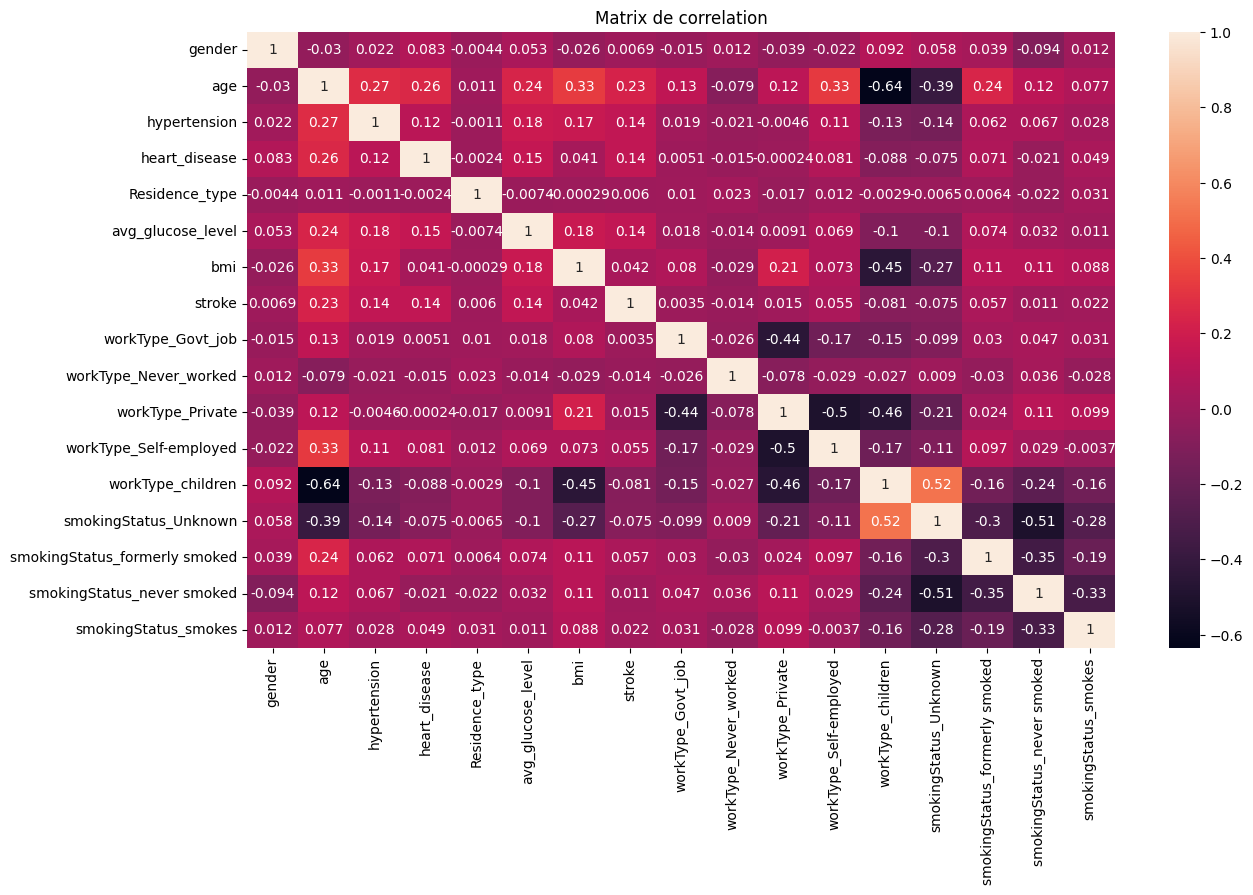

In [ ]:
plt.figure(figsize=(14,8))
sea.heatmap(dataset.corr(),annot=True)
plt.title('Matrix de correlation')
plt.show()

# Baleceamento de dados
Irei fazer tanto o undersampling quanto o oversampling ao final irei mostra meus resultados

In [ ]:
dataset['stroke'].value_counts().reset_index(name='quantity')

,stroke,quantity
0,0,4699
1,1,209


In [ ]:
import numpy as np
from imblearn.over_sampling  import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

### UnderSampling

##### Definindo Amostra

In [ ]:
X = dataset.drop( columns=['stroke'] )
Y = data['stroke']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split( X , Y , test_size=0.3 )

fazendo o undersampling

In [ ]:
x_train.shape , y_train.shape

((3435, 16), (3435, 1))

In [ ]:
under = RandomUnderSampler(random_state=0)

In [ ]:
x_train , y_train = under.fit_resample(x_train,y_train)

In [ ]:
x_train.shape,y_train.shape

((288, 16), (288,))

In [ ]:
y_train.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

##### KNN

In [ ]:
KNeighbors = KNeighborsClassifier()

In [ ]:
KNeighbors.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
pred = KNeighbors.predict(x_test)

Text(0.5, 1.0, 'accuracy_score 0.6809232858112695')

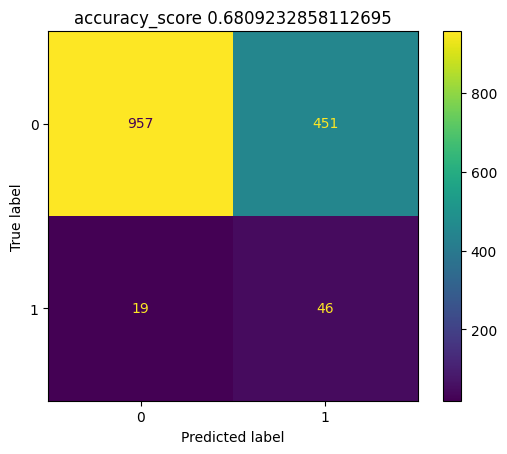

In [ ]:
ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(y_test,pred),
).plot()
plt.title(f'accuracy_score {accuracy_score(y_test,pred)}')

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80      1408
           1       0.09      0.71      0.16        65

    accuracy                           0.68      1473
   macro avg       0.54      0.69      0.48      1473
weighted avg       0.94      0.68      0.77      1473

